# 2.2 파이토치 기초 문법

## 2.2.1 텐서 다루기

###텐서 생성 및 변환

In [1]:
import torch
print(torch.tensor([[1,2], [3,4]])) # 2차원 형태의 텐서 생성
print(torch.tensor([[1,2], [3,4]], device="cuda:0")) # GPU에 텐서 생성
print(torch.tensor([[1,2], [3,4]], dtype=torch.float64)) # dtype을 이용하여 텐서 생성

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]], device='cuda:0')
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [2]:
temp = torch.tensor([[1,2], [3,4]])
print(temp.numpy()) # 텐서를 ndarray로 변환

temp = torch.tensor([[1,2], [3,4]], device="cuda:0")
print(temp.to("cpu").numpy()) # GPU상의 텐서를 CPU의 텐서로 변환한 후 ndarray로 변환

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


###텐서의 인덱스 조작

In [3]:
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7]) # 파이토치로 1차원 벡터 생성
print(temp[0], temp[1], temp[-1]) # 인덱스로 접근
print('--------------------------')
print(temp[2:5], temp[4:-1]) # 슬라이스로 접근

tensor(1.) tensor(2.) tensor(7.)
--------------------------
tensor([3., 4., 5.]) tensor([5., 6.])


### 텐서 연산 및 차원 조작

텐서 연산

In [4]:
v = torch.tensor([1, 2, 3]) # 길이가 3인 벡터 생성
w = torch.tensor([3, 4, 6])
print(w-v) # 길이가 같은 벡터 간 뺄셈 연산

tensor([2, 2, 3])


텐서의 차원 조작

In [5]:
temp = torch.tensor([
    [1, 2], [3, 4]]) # 2X2 행렬 생성

print(temp.shape)
print('--------------------------')
print(temp.view(4, 1)) # 2X2 행렬을 4X1으로 변형
print('--------------------------')
print(temp.view(-1)) # 2X2 행렬을 1차원 벡터로 변형
print('--------------------------')
print(temp.view(1, -1)) # -1=? 다른 차원으로부터 해당 값 유추/ 즉 (1, 4)
print('--------------------------')
print(temp.view(-1, 1)) # -1=? 즉(4,1)

torch.Size([2, 2])
--------------------------
tensor([[1],
        [2],
        [3],
        [4]])
--------------------------
tensor([1, 2, 3, 4])
--------------------------
tensor([[1, 2, 3, 4]])
--------------------------
tensor([[1],
        [2],
        [3],
        [4]])


## 2.2.2 데이터 준비

###단순하게 파일을 불러와서 사용

In [6]:
!pip install pandas

In [7]:
import pandas as pd
import torch
# data = pd.read_csv('../class2.csv') # csv 파일을 불러옴

# x = torch.from_num(data['x'].values).unsqueeze(dim=1).float() # csv 파일의 x 칼럼 값을 넘파이 배열로 받아 Tensor(dtype)으로 바꿔줌
# y = torch.from_num(data['y'].values).unsqueeze(dim=1).float() # csv 파일의 y 칼럼 값을 넘파이 배열로 받아 Tensor(dtype)으로 바꿔줌

###커스텀 데이터셋을 만들어서 사용
- 데이터를 조금씩 나누어 불러서 사용하는 방식

In [ ]:
# CustomDataset 클래스 구현
# class CustomDataset(torch.utils.data.Dataset):
#   def __init__(self): # 필요한 변수를 선언하고, 데이터셋의 전처리를 해 주는 함수
#   def __len__(self): # 데이터셋의 길이, 즉 총 샘플의 수를 가져오는 함수
#   def __getitem__(self, index): # 데이터셋에서 특정 데이터를 가져오는 함수

In [ ]:
# import pandas as pd
# import torch
# from torch.utils.data import Dataset
# from torch.utils.data import DataLoader

# class CustomDataset(Dataset):
#   def __init(self, csv_file): # csv_file 파라미터를 통해 데이터셋 불러옴
#     self.label = pd.read_csv(csv_file)

#   def __len__(self): # 전체 데이터셋의 크기를 반환
#     return len(self.label)

#   def __getitem__(self, idx): # 전체 x와 y데이터 중에 해당 idx번째의 데이터를 가져옴
#     sample = torch.tensor(self.label.iloc[idx, 0:3]).int()
#     label = torch.tensor(self.label.iloc[idx,3]).int()
#     return sample, label

# tensor_dataset = CustomDataset('../covtype.csv')
# dataset = DataLoader(tensor_dataset, batch_size=4, shuffle=True) # 데이터셋을 torch.utils.data.DataLoader에 파라미터로 전달

###파이토치에서 제공하는 데이터셋 사용

In [8]:
!pip install requests

In [9]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
]) # 평균이 0.5, 표준편차가 1.0이 되도록 데이터의 분포 조정

from torchvision.datasets import MNIST
import requests
download_root = '../euron_ch2/data/MNIST_DATASET'

train_dataset = MNIST(
    download_root,
    transform=mnist_transform,
    train=True,
    download=True
)
valid_dataset = MNIST(
    download_root,
    transform=mnist_transform,
    train=False,
    download=True
)
test_dataset = MNIST(
    download_root,
    transform=mnist_transform,
    train=False,
    download=True
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 491kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.89MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.61MB/s]


## 2.2.3 모델 정의
- 계층: 모듈 or 모듈을 구성하는 한 개의 계층
- 모듈: 한 개 이상의 계층이 모여서 구성된 것
- 모델: 최종적으로 원하는 네트워크

###nn.Module()을 상속하여 정의하는 방법

In [ ]:
# class MLP(Module):
#   def __init__(self, inputs):
#     super(MLP, self).__init__()
#     self.layer = Linear(inputs, 1) # 계층 정의
#     self.activation = Sigmoid() # 활성화 함수 정의

#   def forward(self, X):
#     X = self.layer(X)
#     X = self.axtivation(X)
#     return X

### Sequential 신경망을 정의하는 방법

In [10]:
import torch.nn as nn
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.ReLU(inplace=True))

    def forward(self, x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = x.view(x.shape[0], -1)
      x = self.layer3(x)
      return x

model = MLP() # 모델에 대한 객체 생성

print("Printing children\n--------------------------")
print(list(model.children()))
print("\n\nPrinting Modules\n--------------------------")
print(list(model.modules()))

Printing children
--------------------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]


Printing Modules
--------------------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_fea

### 함수로 신경망을 정의하는 방법

In [11]:
def MLP(in_features=1, hidden_features=20, out_features=1):
  hidden = nn.Linear(in_features=in_features, out_features=hidden_features, bias=True)
  activation = nn.ReLU()
  output = nn.Linear(in_featrues=hidden_features, out_features=out_features, bias=True)
  net = nn.Sequential(hidden, activation, output)
  return net

## 2.2.4 모델의 파라미터 정의

In [15]:
# from torch.optim import optimizer
# criterion = torch.nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda epoch: 0.95 ** epoch)

# for epoch in range(1, 100+1): # 에포크 수만큼 데이터를 반복 처리
#   for x, y in dataloader:
#     optimizer.zero_grad()
# loss_fn(model(x), y).backward()
# optimizer.step()
# scheduler.step()

## 2.2.5 모델 훈련

In [ ]:
# # 모델 훈련 예시
# for epoch in range(100):
#   yhat = model(x_train)
#   loss = criterion(yhat, y_train)
#   optimizer.zero_grad() # 오차가 중첩적으로 쌓이지 않도록 초기화
#   loss.backward()
#   optimizer.step()

## 2.2.6 모델 평가

In [16]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 20.8 MB/s eta 0:00:00


함수를 이용하여 모델을 평가

In [19]:
# import torch
# import torchmetrics

# preds = torch.randn(10, 5).softmax(dim=-1)
# target = torch.randint(5, (10,))

# acc = torchmetrics.functional.accuracy(preds, target)

모듈을 이용하여 모델을 평가

In [ ]:
# import torch
# import torchmetrics
# metric = torchmetrics.Accuracy() # 모델 평가 초기화

# n_batches = 10
# for i in range(n_batches):
#   preds = torch.randn(10, 5).softmax(dim=-1)
#   target = torch.randint(5, (10,))

#   acc = metric(preds, target)
#   print(f"Accuracy on batch {i}: {acc}") # 현재 배치에서 모델 평가(정확도)

# acc = metric.compute()
# print(f"Accuracy on all data: {acc}") # 모든 배치에서 모델 평가(정확도)

## 2.2.7 훈련 과정 모니터링

In [20]:
!pip install tensorboard

텐서보드 사용하기

In [22]:
# import torch
# from torch.utils.tensorboard import SummaryWriter
# writer = SummaryWriter("../euron_ch2/tensorboard")

# for epoch in range(num_epochs):
#   model.train() # 학습 모드로 전환(dropout=True)
#   batch_loss=0.0

#   for i, (x, y) in enumerate(dataloader):
#     x, y = x.to(device).float(), y.to(device).float()
#     outputs = model(x)
#     loss = criterion(outputs, y)
#     writer.add_scalar("Loss", loss, epoch) # 스칼라 값을 기록
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

# writer.close() # SummaryWriter가 더 이상 필요하지 않으면 close() 메서드 호출


# 2.4 파이토치 코드 맛보기

In [23]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [24]:
# 2-1 필요한 라이브러리 호출
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
# 2-2 데이터 호출
dataset = pd.read_csv('../euron_ch2/data/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

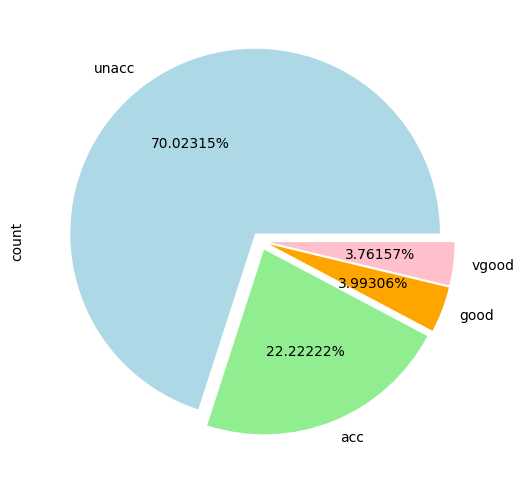

In [28]:
# 2-3 예제 데이터셋 분포
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%',
colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

데이터 전처리

In [29]:
# 2-4 데이터를 범주형 타입으로 변환
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns:
  dataset[category] = dataset[category].astype('category') # astype()메서드로 데이터를 범주형으로 변환

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10] # 합친 넘파이 배열 중 열 개의 행을 출력

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [30]:
# 2-5 배열을 텐서로 변환
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [31]:
# 2-6 레이블로 사용할 칼럼을 텐서로 변환
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten() # 1차원 텐서로 변환

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [37]:
# get_dummies 예제
data={
    'gender' : ['male', 'female', 'male'],
    'weight' : [72, 55, 68],
    'nation' : ['Japan', 'Korea', 'Australia']
}

df = pd.DataFrame(data)
df

pd.get_dummies(df)

,weight,gender_female,gender_male,nation_Australia,nation_Japan,nation_Korea
0,72,False,True,False,True,False
1,55,True,False,False,False,True
2,68,False,True,True,False,False


In [38]:
# 2-7 범주형 칼럼을 N차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in
                            categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in
                               categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [41]:
# 2-8 데이터셋 분리
total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

In [42]:
# 2-9 데이터셋 분리 확인
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


데이터 준비 끝!
모델 네트워크 생성

In [44]:
# 2-10 모델의 네트워크 생성
class Model(nn.Module): # class 형태로 구현되는 모델은 nn.Module을 상속받음
  def __init__(self, embedding_size, output_size, layers, p=0.4): # init:파라미터&신경망 초기화 용도
    # self: 첫번째 파라미터는 self를 지정해야함
    # embedding_size: 범주형 칼럼의 임베딩 크기
    # output_size: 출력층의 크기
    # layers: 모든 계층에 대한 목록
    # p: 드롭아웃(기본 0.5)
    super().__init__() # 부모 클래스 접근
    self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni,
                                         nf in embedding_size])
    self.embedding_dropout = nn.Dropout(p)

    all_layers = []
    num_categorical_cols = sum((nf for ni, nf in embedding_size))
    input_size = num_categorical_cols

    for i in layers:
      all_layers.append(nn.Linear(input_size, i)) # 선형 변환
      all_layers.append(nn.ReLU(inplace=True)) # 활성화 함수
      all_layers.append(nn.BatchNorm1d(i)) # 배치 정규화
      all_layers.append(nn.Dropout(p)) # 과적합 방지
      input_size = i

    all_layers.append(nn.Linear(layers[-1], output_size))
    self.layers = nn.Sequential(*all_layers)

  def forward(self, x_categorical):
    embeddings = []
    for i, e in enumerate(self.all_embeddings):
      embeddings.append(e(x_categorical[:, i]))

    x = torch.cat(embeddings, 1) # 넘파이의 concatenate와 같지만 대상:텐서
    x = self.embedding_dropout(x)
    x = self.layers(x)
    return x


In [45]:
# 2-11 Model 클래스의 객체 생성
model = Model(categorical_embedding_sizes, 4, [200, 100, 50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [47]:
# 2-12 모델의 파라미터 정의
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [48]:
# 2-13 CPU/GPU 사용 지정
if torch.cuda.is_available():
  device = torch.device('cuda') # GPU 사용
else:
  device = torch.device('cpu') # 없으면 CPU 사용

훈련 준비 끝!
데이터를 이용하여 모델 학습

In [49]:
# 2-14 모델 학습
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)

for i in range(epochs): # for문 500회 반복, 각 반복마다 손실 함수가 오차 계산
  i +=1
  y_pred = model(categorical_train_data).to(device)
  single_loss = loss_function(y_pred, train_outputs)
  aggregated_losses.append(single_loss) # 반복할 때마다 오차를 aggregated_losses에 추가

  if i%25 == 1:
    print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

  optimizer.zero_grad()
  single_loss.backward() # 가중치를 업데이트하기 위해 손실 함수의 backward() 메서드 호출
  optimizer.step() # 옵티마이저 함수의 step() 메서드를 이용하여 기울기 업데이트

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}') # 오차가 25 epoch마다 출력

epoch:   1 loss: 1.62831151
epoch:  26 loss: 1.42962027
epoch:  51 loss: 1.32056499
epoch:  76 loss: 1.23162675
epoch: 101 loss: 1.08712542
epoch: 126 loss: 0.94222379
epoch: 151 loss: 0.82797635
epoch: 176 loss: 0.74663544
epoch: 201 loss: 0.71032995
epoch: 226 loss: 0.67684633
epoch: 251 loss: 0.62947941
epoch: 276 loss: 0.62530053
epoch: 301 loss: 0.60195500
epoch: 326 loss: 0.59246695
epoch: 351 loss: 0.59520644
epoch: 376 loss: 0.58633816
epoch: 401 loss: 0.58702993
epoch: 426 loss: 0.58086765
epoch: 451 loss: 0.58487290
epoch: 476 loss: 0.57960933
epoch: 500 loss: 0.5700920224


학습 끝! 테스트 데이터셋으로 예측 진행

In [62]:
# 2-15 테스트 데이터셋으로 모델 예측
test_outputs = test_outputs.to(device=device, dtype=torch.int64)

with torch.no_grad():
    y_val = model(categorical_test_data)  # 이제 y_val도 GPU에 있음
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.57972068


In [63]:
# 2-16 모델의 예측 확인
print(y_val[:5])

tensor([[ 2.7851,  1.6718, -3.5953, -3.4631],
        [ 3.3056,  2.1791, -5.2233, -5.5471],
        [ 2.0358,  1.2689, -2.7185, -2.3289],
        [ 3.1135,  1.7284, -4.4627, -4.1672],
        [ 2.0639,  1.4120, -2.6999, -2.2461]], device='cuda:0')


In [64]:
# 2-17 가장 큰 값을 갖는 인덱스 확인
y_val = y_val.cpu().numpy()   # GPU 텐서를 CPU 넘파이 배열로 변환
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

[0 0 0 0 0]


In [66]:
# 2-18 테스트 데이터셋을 이용한 정확도 확인
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# GPU Tensor → CPU NumPy 변환
y_true = test_outputs.cpu().numpy()
y_pred = y_val  # 이미 np.argmax로 넘파이 배열로 바꿔둔 상태

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

[[257   2]
 [ 86   0]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       259
           1       0.00      0.00      0.00        86

    accuracy                           0.74       345
   macro avg       0.37      0.50      0.43       345
weighted avg       0.56      0.74      0.64       345

0.744927536231884
